In [1]:
import sys
import os
import json
import numpy as np
import pandas as pd
import pyarrow as pa
import matplotlib.pyplot as plt

#from torch import nn
from pathlib import Path
from typing import Union

sys.path.append(os.path.expanduser('~/Documents/Medley'))
from Medley.interpretation import all_expids, predselpath, return_experiments, find_experiments_with, return_unique_values, load_pred_results, compare_scores

In [2]:
ids = find_experiments_with(keyval_dict={'scoring':'r2','startyear':1950})

In [3]:
ids

{'0feaf5a9de',
 '36bec5369d',
 '6992361a96',
 '9809047ebb',
 'ae76a06410',
 'deb4021d58',
 'fc60bee6df',
 'fd62b92eda'}

In [4]:
test = compare_scores(ids, cv = False)

<Axes: xlabel='npredictors'>

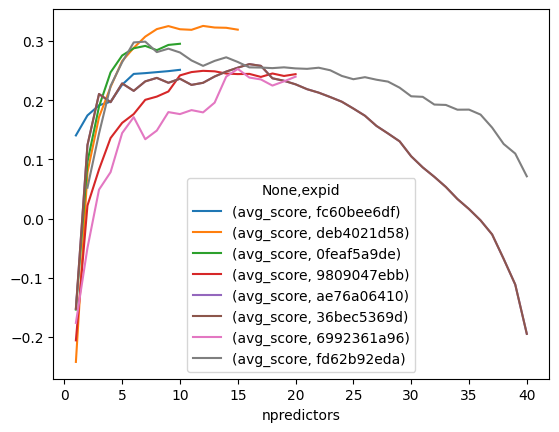

In [5]:
test.unstack(0).plot()

In [6]:
return_unique_values('firstmonth') # Reason for the worse score is including december

firstmonth  count
1           0        36bec5369d
            1        fc60bee6df
            2        561c0adbb8
            3        41eb223566
            4        ae76a06410
            5        32e6b7520d
            6        deb4021d58
            7        6034f0405d
            8        6992361a96
            9        0feaf5a9de
            10       fd62b92eda
12          0        9809047ebb
Name: expid, dtype: object

In [7]:
return_unique_values('n') # as both the best and the worst have n = 3

n  count
1  0        36bec5369d
   1        fc60bee6df
   2        561c0adbb8
   3        41eb223566
   4        ae76a06410
   5        6034f0405d
   6        0feaf5a9de
   7        fd62b92eda
3  0        9809047ebb
   1        32e6b7520d
   2        deb4021d58
   3        6992361a96
Name: expid, dtype: object

In [8]:
return_unique_values('max_depth') # Reason strong decline after 7 predictors seems to be deepest trees.

{10: ['9809047ebb', 'deb4021d58', '0feaf5a9de'],
 5: ['6034f0405d'],
 15: ['fd62b92eda']}

In [9]:
return_unique_values('min_samples_split')

{0.01: ['9809047ebb', '6034f0405d', 'fd62b92eda'], 0.001: ['deb4021d58']}

In [3]:
df_forward, sc = load_pred_results('deb4021d58')

<Axes: xlabel='npredictors'>

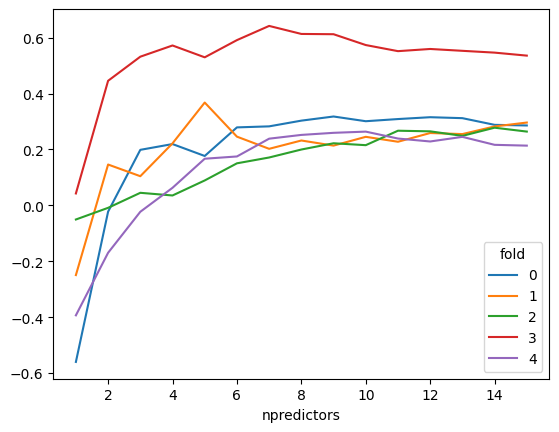

In [4]:
sc.plot()

In [5]:
df_forward.loc[10,'feature_names']

((('enso', 34, 'ersstv5'), -1),
 (('nao', 0, 'ncep'), -2),
 (('nao', 0, 'station'), -1),
 (('snao', 0, 'ncep'), -1),
 (('ao', 0, 'ncep'), -1),
 (('med_u250_latmax', 0, 'era5'), -1),
 (('med_u250', 20, 'era5'), -1),
 (('med_u250', 40, 'era5'), -3),
 (('med_u500', 50, 'era5'), -1),
 (('med_u500', 60, 'era5'), -1))

In [12]:
df_forward.loc[5,'feature_names']

((('enso', 34, 'ersstv5'), -1),
 (('nao', 0, 'station'), -1),
 (('ao', 0, 'ncep'), -1),
 (('med_u250', 20, 'era5'), -1),
 (('med_u500', 60, 'era5'), -1))

In [27]:
df_backward, sc_backward = load_pred_results('fd62b92eda')

In [8]:
df_backward.loc[5,'feature_names']

((('enso', 34, 'ersstv5'), -1),
 (('med_u250_latmax', 0, 'era5'), -1),
 (('atl_u250', 30, 'era5'), -1),
 (('med_u500', 20, 'era5'), -1),
 (('med_u500', 60, 'era5'), -1))

In [16]:
return_experiments('fc60bee6df')

{'fc60bee6df': {'prep_kwargs': {'target_region': {'include': {'iberia': [-9.8,
      35.98,
      8,
      44.6],
     'italy': [8, 35, 18, 45.63]},
    'exclude': {'north_africa': [-1.45, 34.457, 11.217, 36.972],
     'eastadriatic': [15, 43, 20, 48],
     'tunesia': [5, 30, 12, 38],
     'pyrenees': [-2, 41.8, 3.7, 45.63]}},
   'target_var': 'SPI3',
   'minsamples': 10,
   'resampling': 'multi',
   'resampling_kwargs': {'precursor_agg': 1,
    'n': 1,
    'separation': 0,
    'target_agg': 1,
    'firstmonth': 1,
    'lastmonth': 3}},
  'bottleneck_kwargs': {'startyear': 1950,
   'endyear': 2023,
   'fraction_valid': 0.8},
  'cv_kwargs': {'n_temporal': 5},
  'estimator': 'linreg',
  'estimator_kwargs': {},
  'sequential_kwargs': {'k_features': 10,
   'forward': True,
   'scoring': 'r2',
   'n_jobs': 10}}}

In [18]:
df_linreg, sc_linreg = load_pred_results('fc60bee6df')

<Axes: xlabel='npredictors'>

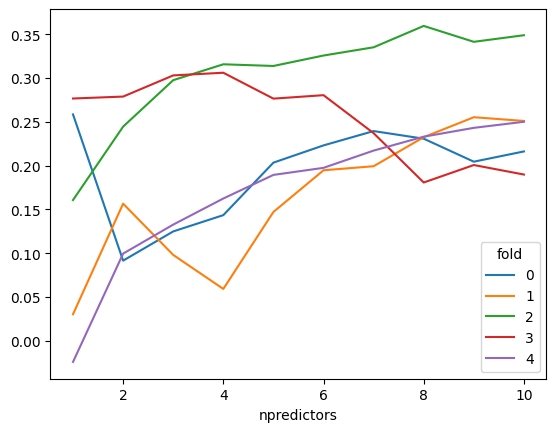

In [20]:
sc_linreg.plot()

In [26]:
df_linreg.loc[1,'feature_names']

((('ao', 0, 'trenb'), -1),)

### Method intercomparison
mlr versus rf versus xgboost

In [2]:
r2_ids = find_experiments_with(keyval_dict={'scoring':'r2','startyear':1950})

In [3]:
mse_ids = find_experiments_with(keyval_dict={'scoring':'neg_mean_squared_error','startyear':1950})

In [4]:
estimators = return_unique_values('estimator')
estimators_reversed = pd.Series(estimators.index.get_level_values(0), index = pd.Index(estimators.values,name = 'expid'))

In [14]:
test = compare_scores(r2_ids, cv = False)
# Perhaps add this latter code plus the above to 
newindex = test.index.to_frame()
newindex.loc[:,'estimator'] = estimators_reversed.reindex(test.index.get_level_values('expid')).values
test.index = pd.MultiIndex.from_frame(newindex).reorder_levels([-1,0,1])
test = test.sort_index()

/scistor/ivm/jsn295/Documents/Medley/Medley/interpretation.py:110: UserWarning: results file for 1effbf091f not found. failed or still running. skipping to next
  warnings.warn(f'results file for {expid} not found. failed or still running. skipping to next')


<Axes: xlabel='npredictors'>

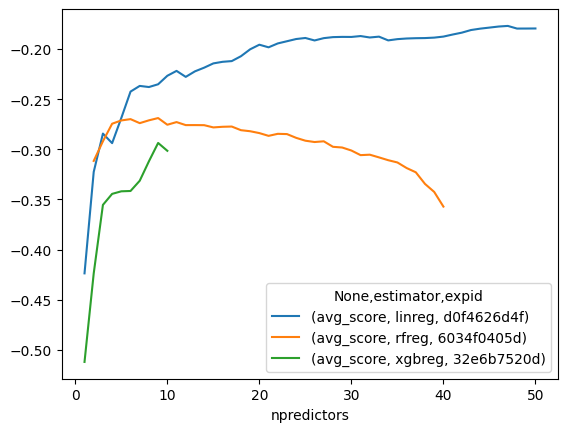

In [13]:
test.loc[(slice(None),slice(None),slice(0,50)),:].unstack([0,1]).plot()

<Axes: xlabel='npredictors'>

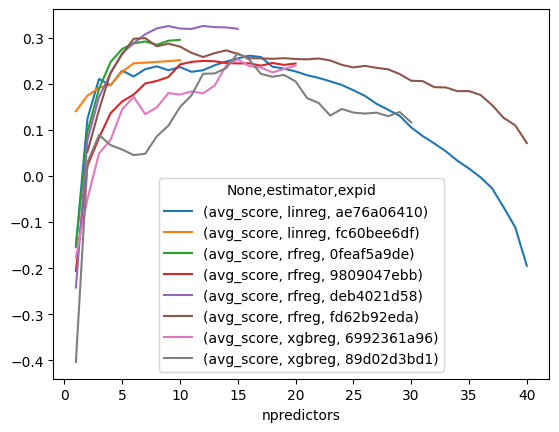

In [15]:
test.unstack([0,1]).plot()

In [9]:
test.loc['linreg',:].unstack(0)

,avg_score
expid,d0f4626d4f
npredictors,
1,-0.423782
2,-0.322577
3,-0.284374
4,-0.293904
5,-0.268756
...,...
125,-1.061604
126,-1.200965


In [16]:
return_experiments(find_experiments_with('estimator', 'xgbreg'))

{'89d02d3bd1': {'prep_kwargs': {'target_region': {'include': {'iberia': [-9.8,
      35.98,
      8,
      44.6],
     'italy': [8, 35, 18, 45.63]},
    'exclude': {'north_africa': [-1.45, 34.457, 11.217, 36.972],
     'eastadriatic': [15, 43, 20, 48],
     'tunesia': [5, 30, 12, 38],
     'pyrenees': [-2, 41.8, 3.7, 45.63]}},
   'target_var': 'SPI3',
   'minsamples': 10,
   'resampling': 'multi',
   'resampling_kwargs': {'precursor_agg': 1,
    'n': 3,
    'separation': 0,
    'target_agg': 1,
    'firstmonth': 1,
    'lastmonth': 3}},
  'bottleneck_kwargs': {'startyear': 1950,
   'endyear': 2023,
   'fraction_valid': 0.8},
  'cv_kwargs': {'n_temporal': 5},
  'estimator': 'xgbreg',
  'estimator_kwargs': {'n_estimators': 100,
   'max_depth': 8,
   'learning_rate': 0.1,
   'n_jobs': 1},
  'sequential_kwargs': {'k_features': 30,
   'forward': True,
   'scoring': 'r2',
   'n_jobs': 20}},
 '32e6b7520d': {'prep_kwargs': {'target_region': {'include': {'iberia': [-9.8,
      35.98,
      8,
 